# HW 9 BDS4440

In [5]:
from sklearn.datasets import fetch_openml
import numpy as np
np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
X = mnist['data'][idx]
y = mnist['target'][idx]

# Problem 1: Using the TSNE algorithm, comppress the MNIST feature data into 2 components. Plot these components using a scatter plot.
Use the `.fit_transform()` method (of the `TSNE` package) to transform the MNIST features into a data set comprising of two features. In the scatter plot, include a `colorbar()`, and in the `plt.scatter()` function specify the colors as the target, i.e. `c=y` and the color mapping as `cmap='jet'`. If you dont know any of these terms/functions, google them and read the technical document!

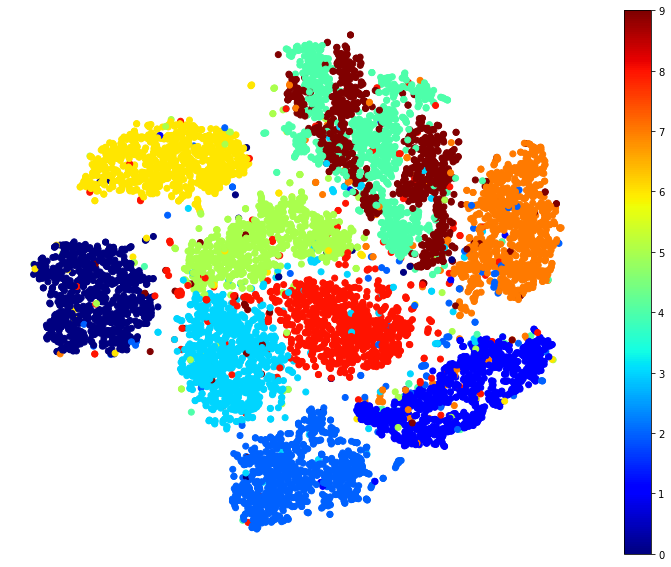

In [4]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
plt.figure(figsize=(13,10))
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

# Problem 2: 

Using the reduced data set made from the TSNE package of 2 components (from problem 1), run the K means algorithm through a range of values for K.

At each K, get the sum of squared errors (the inertia) and the silhouette score. Save these scores to lists so you can plot them side by side and see how the SSE and silhoette vary with K.

* `sse = model.inertia_`

Recall that inorder to run the silhouette score, you must also predict the cluster labels of each row.
* `labels = model.labels_`

To make the silhoette score, you must include these labels as well as the features

* `silhoette_score(df[features],df['cluster_labels'],metric='euclidean')`

In [19]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
import pandas as pd

scores = {'sse':[],'silhouette':[]}
for k in range(2,40):
    model = KMeans(n_clusters=k,max_iter=100)
    model.fit(X_reduced)
    df = pd.DataFrame(X_reduced)
    df['cluster'] = model.labels_
    silhouette = silhouette_score(df[df.columns[:1]],df['cluster'],metric='euclidean')
    sse = model.inertia_
    scores['sse'].append(sse)
    scores['silhouette'].append(silhouette)

# Problem 3: 

Make two plots. One of the K vs SSE and the other of K vs silhouette score. Make these plots side by side and parallel using the `plt.subplot` arguments.

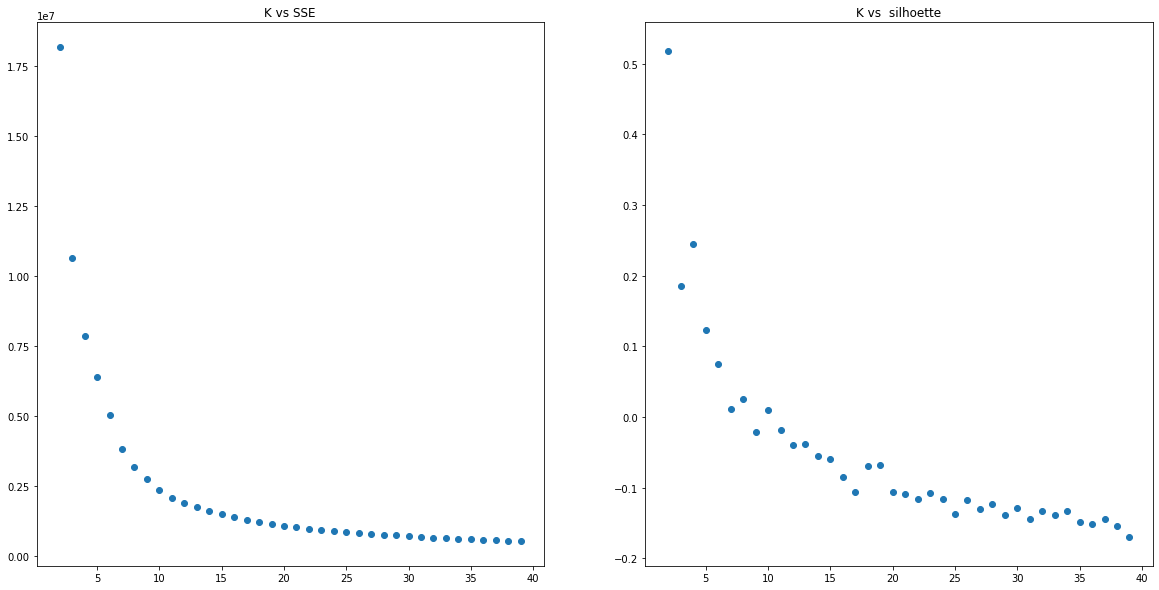

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(range(2,40),scores['sse'])
plt.title('K vs SSE')

plt.subplot(1,2,2)
plt.scatter(range(2,40),scores['silhouette'])
plt.title('K vs  silhoette')
plt.show()

# Question 4
## Look at your plot in question 1 and your plots in question 3. How do they compare? Is it obvious that K means fits well to the t-sne reduced data? Why or why not?

Based upon the plot of the intertia (sum of squared errors vs values of K for kmeans) and silhoette score vs K, you can see that K means doesn't fit very well. Despite their being an 'elbow' of the SSE plot, there is a low silhoette score associated with the elbow. Thus it's not fitting as well as it should be.

The reason for K means not fitting the data very well is because the clusters are somewhat mushed together, not uniform in shape and have overlapping values. These things cause K means to not fit well.

# Load the iris data for questions 5 and on

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
X,y = load_iris(return_X_y=True)
df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Question 5: Use the `StandardScaler` preprocessor to take all the iris features and put them into a standard scaler format.

In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
df[[0,1,2,3]] = X
df.head()

,0,1,2,3,target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


# Question 6: 

Test different approachs to hierarchial clustering  (different linkage methods). Loop through the list of `['single','complete','average','ward']` to create a different clustering the scaled features produced in question 5. Then using the `pdist` function on the scaled features, as well as the hierarchial cluster itsself,  find the cophenetic correlation coefficient using the `cophenet` function. Print the coefficient for each linkage proctool.

In [42]:
from scipy.cluster.hierarchy import linkage,cophenet
from scipy.spatial.distance import pdist

for L in ['single','complete','average','ward']:
    Z = linkage(X,L)
    c,dist = cophenet(Z,pdist(X))
    print(c,' L: {}'.format(L))

0.8300050311044441  L: single
0.7514592238524537  L: complete
0.8543605621101562  L: average
0.8226303613177273  L: ward


# Question 7: 

Using the best performing linkage protocol (highest cophenetic coefficient), make a plot of the dendrogram using the `dendrogram(Z)` function

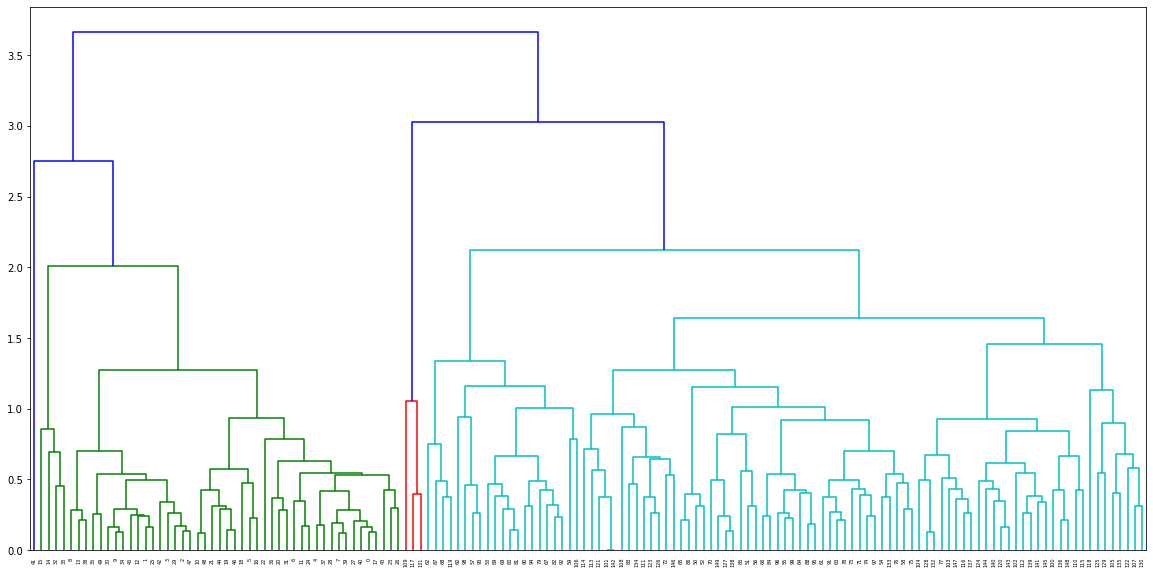

In [50]:
from scipy.cluster.hierarchy import dendrogram,linkage
fig,ax = plt.subplots(figsize=(20,10))
Z = linkage(X,'average')
dn = dendrogram(Z)

# Question 8: 

Using the `fcluster` function on the clustering protocol used in question 7, find the max distance at which there is only 1 unique cluster.
This means that the set of clusters returned by the `fcluster` function will only have one unique value.
Loop through a range of distances to find that value. Print that value.

In [54]:
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet,fcluster

Z = linkage(X,'average')

for max_dist in list(np.arange(0,4,0.1)):
    clusters = fcluster(Z,max_dist,criterion='distance')
    if len(set(clusters))==1:
        print(clusters)
        print('Sinlge Clusters merged at {}'.format(max_dist))
        break

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Sinlge Clusters merged at 3.7
